# Gather

In [111]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')

In [112]:
df = df[['PassengerId','Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Name', 'Embarked']]

# Assess

In [113]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name,Embarked
0,1,0,3,male,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",S
1,2,1,1,female,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,3,1,3,female,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",S
3,4,1,1,female,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,5,0,3,male,35.0,0,0,8.0500,"Allen, Mr. William Henry",S


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Name         891 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [115]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Name             0
Embarked         2
dtype: int64

In [116]:
df.set_index('PassengerId')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",S
2,1,1,female,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
3,1,3,female,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",S
4,1,1,female,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
5,0,3,male,35.0,0,0,8.0500,"Allen, Mr. William Henry",S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,"Montvila, Rev. Juozas",S
888,1,1,female,19.0,0,0,30.0000,"Graham, Miss. Margaret Edith",S
889,0,3,female,NaN,1,2,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",S


# Clean

In [117]:
#impute the missing values in Age Column
mean = df["Age"].mean()
std = df["Age"].std()
is_null = df["Age"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice
df["Age"] = df["Age"].astype(int)

df['Age'].fillna(df['Age'].mean(), inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name,Embarked
0,1,0,3,male,22,1,0,7.2500,"Braund, Mr. Owen Harris",S
1,2,1,1,female,38,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,3,1,3,female,26,0,0,7.9250,"Heikkinen, Miss. Laina",S
3,4,1,1,female,35,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,5,0,3,male,35,0,0,8.0500,"Allen, Mr. William Henry",S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,"Montvila, Rev. Juozas",S
887,888,1,1,female,19,0,0,30.0000,"Graham, Miss. Margaret Edith",S
888,889,0,3,female,20,1,2,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",S
889,890,1,1,male,26,0,0,30.0000,"Behr, Mr. Karl Howell",C


In [118]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name,Embarked
0,1,0,3,male,22,1,0,7.2500,"Braund, Mr. Owen Harris",S
1,2,1,1,female,38,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,3,1,3,female,26,0,0,7.9250,"Heikkinen, Miss. Laina",S
3,4,1,1,female,35,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,5,0,3,male,35,0,0,8.0500,"Allen, Mr. William Henry",S


# Analysis

In [119]:
#Try to find the correlation between features and our end goal
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [120]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [121]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [122]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Observations: 
1. Sex is the highest positivie coefficient
2. Pclass and survival rate are
inversely correlated
3. Title is also positively correlated with survival rate

In [123]:
#normalize the features
normalized_df = df
#normalized_df['Age'] = (normalized_df['Age'] - normalized_df['Age'].min()) / (normalized_df['Age'].max() - normalized_df['Age'].min())    
normalized_df['Fare'] = (normalized_df['Fare'] - normalized_df['Fare'].min()) / (normalized_df['Fare'].max() - normalized_df['Fare'].min())    

normalized_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Name,Embarked
0,1,0,3,male,22,1,0,0.014151,"Braund, Mr. Owen Harris",S
1,2,1,1,female,38,1,0,0.139136,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C
2,3,1,3,female,26,0,0,0.015469,"Heikkinen, Miss. Laina",S
3,4,1,1,female,35,1,0,0.103644,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",S
4,5,0,3,male,35,0,0,0.015713,"Allen, Mr. William Henry",S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,0.025374,"Montvila, Rev. Juozas",S
887,888,1,1,female,19,0,0,0.058556,"Graham, Miss. Margaret Edith",S
888,889,0,3,female,20,1,2,0.045771,"Johnston, Miss. Catherine Helen ""Carrie""",S
889,890,1,1,male,26,0,0,0.058556,"Behr, Mr. Karl Howell",C


In [124]:
#Converting categorical feature
normalized_df[['S', 'Q', 'C']] = pd.get_dummies(normalized_df['Embarked'])
normalized_df[['p1', 'p2', 'p3']] = pd.get_dummies(normalized_df['Pclass'])
normalized_df[['f', 'm']] = pd.get_dummies(normalized_df['Sex'])

In [125]:
X = normalized_df.drop(columns = ['Sex', 'Embarked', 'f', 'p1', 'S', 'Survived', 'PassengerId', 'Pclass', 'Name'])
y = df['Survived']

In [126]:
X

,Age,SibSp,Parch,Fare,Q,C,p2,p3,m
0,22,1,0,0.014151,0,1,0,1,1
1,38,1,0,0.139136,0,0,0,0,0
2,26,0,0,0.015469,0,1,0,1,0
3,35,1,0,0.103644,0,1,0,0,0
4,35,0,0,0.015713,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
886,27,0,0,0.025374,0,1,1,0,1
887,19,0,0,0.058556,0,1,0,0,0
888,20,1,2,0.045771,0,1,0,1,0
889,26,0,0,0.058556,0,0,0,0,1


In [127]:
X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.20, random_state=0)

In [128]:
X_train

,Age,SibSp,Parch,Fare,Q,C,p2,p3,m
140,26,0,2,0.029758,0,0,0,1,0
439,31,0,0,0.020495,0,1,1,0,1
817,31,1,1,0.072227,0,0,1,0,1
378,20,0,0,0.007832,0,0,0,1,1
491,21,0,0,0.014151,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...
835,39,1,1,0.162314,0,0,0,0,0
192,19,1,0,0.015330,0,1,0,1,0
629,30,0,0,0.015094,1,0,0,1,1
559,36,1,0,0.033963,0,1,0,1,0


## Fit the data into Logistic Regression model

In [129]:
log_mod = LogisticRegression(solver='liblinear')
log_mod.fit(X_train, y_train)
preds = log_mod.predict(X_test)
confusion_matrix(y_test, preds) 

array([[94, 16],
       [20, 49]])

In [130]:
precision_score(y_test, preds) 

0.7538461538461538

In [131]:
accuracy_score(y_test, preds)

0.7988826815642458

In [132]:
acc_log = round(log_mod.score(X_train, y_train) * 100, 2)
acc_log

80.34

## Fit Data in DecisionTree Model

In [133]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [134]:
precision_score(y_test, y_pred) 

0.8059701492537313

In [135]:
accuracy_score(y_test, y_pred)

0.8435754189944135

In [136]:
acc_log = round(clf.score(X_train, y_train) * 100, 2)
acc_log

98.31

## Fit Data in Random Forest Model

In [137]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf= RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [138]:
precision_score(y_test, y_pred) 

0.8775510204081632

In [139]:
accuracy_score(y_test, y_pred)

0.8212290502793296

In [140]:
acc_log = round(clf.score(X_train, y_train) * 100, 2)
acc_log

83.01

Random Forest Model so far performs the best. Let's see if we can further improve the model.

In [141]:
feature_list = list(X.columns)
feature_list

['Age', 'SibSp', 'Parch', 'Fare', 'Q', 'C', 'p2', 'p3', 'm']

In [142]:
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: m                    Importance: 0.54
Variable: Fare                 Importance: 0.15
Variable: p3                   Importance: 0.14
Variable: Age                  Importance: 0.06
Variable: SibSp                Importance: 0.04
Variable: Parch                Importance: 0.02
Variable: C                    Importance: 0.02
Variable: p2                   Importance: 0.02
Variable: Q                    Importance: 0.01


[None, None, None, None, None, None, None, None, None]

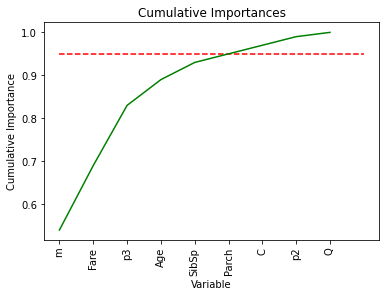

In [143]:
import matplotlib.pyplot as plt

x_values = list(range(len(importances)))
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances, 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical')
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [144]:
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 6


In [145]:
important_feature_names = [feature[0] for feature in feature_importances[0:5]]
important_indices = [feature_list.index(feature) for feature in important_feature_names]
important_feature_names

['m', 'Fare', 'p3', 'Age', 'SibSp']

## Import the test dataset

In [146]:
df2 = pd.read_csv('test.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [147]:
df2 = df2[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Parch', 'Embarked']]
df2

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Parch,Embarked
0,892,3,male,34.5,0,7.8292,0,Q
1,893,3,female,47.0,1,7.0000,0,S
2,894,2,male,62.0,0,9.6875,0,Q
3,895,3,male,27.0,0,8.6625,0,S
4,896,3,female,22.0,1,12.2875,1,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,8.0500,0,S
414,1306,1,female,39.0,0,108.9000,0,C
415,1307,3,male,38.5,0,7.2500,0,S
416,1308,3,male,NaN,0,8.0500,0,S


In [148]:
mean = df2["Age"].mean()
std = df2["Age"].std()
is_null = df2["Age"].isnull().sum()
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
age_slice = df2["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df2["Age"] = age_slice
df2["Age"] = df2["Age"].astype(int)



In [149]:
df2.isnull().sum().sum()

1

In [150]:
df2['Fare'].fillna(df2['Fare'].mean(), inplace=True)

In [151]:
df2.isnull().sum().sum()

0

In [152]:
normalized_df2 = df2.copy()
#normalized_df2['Age'] = (normalized_df2['Age'] - normalized_df2['Age'].min()) / (normalized_df2['Age'].max() - normalized_df2['Age'].min())    
normalized_df2['Fare'] = (normalized_df2['Fare'] - normalized_df2['Fare'].min()) / (normalized_df2['Fare'].max() - normalized_df2['Fare'].min())    

normalized_df2

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Parch,Embarked
0,892,3,male,34,0,0.015282,0,Q
1,893,3,female,47,1,0.013663,0,S
2,894,2,male,62,0,0.018909,0,Q
3,895,3,male,27,0,0.016908,0,S
4,896,3,female,22,1,0.023984,1,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,37,0,0.015713,0,S
414,1306,1,female,39,0,0.212559,0,C
415,1307,3,male,38,0,0.014151,0,S
416,1308,3,male,26,0,0.015713,0,S


In [153]:
normalized_df2[['S', 'Q', 'C']] = pd.get_dummies(normalized_df2['Embarked'])
normalized_df2[['p1', 'p2', 'p3']] = pd.get_dummies(normalized_df2['Pclass'])
normalized_df2[['f', 'm']] = pd.get_dummies(normalized_df2['Sex'])

In [154]:
X2 = normalized_df2.drop(columns = ['Sex', 'Embarked', 'f', 'p1', 'S', 'PassengerId', 'Pclass'])

In [155]:
X2

,Age,SibSp,Fare,Parch,Q,C,p2,p3,m
0,34,0,0.015282,0,1,0,0,1,1
1,47,1,0.013663,0,0,1,0,1,0
2,62,0,0.018909,0,1,0,1,0,1
3,27,0,0.016908,0,0,1,0,1,1
4,22,1,0.023984,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
413,37,0,0.015713,0,0,1,0,1,1
414,39,0,0.212559,0,0,0,0,0,0
415,38,0,0.014151,0,0,1,0,1,1
416,26,0,0.015713,0,0,1,0,1,1


In [156]:
y_pred = clf.predict(X2)

In [157]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [158]:
len(y_pred)

418

In [159]:
len(X2)

418

In [160]:
df2['Survived'] = y_pred

In [161]:
df2

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Parch,Embarked,Survived
0,892,3,male,34,0,7.8292,0,Q,0
1,893,3,female,47,1,7.0000,0,S,0
2,894,2,male,62,0,9.6875,0,Q,0
3,895,3,male,27,0,8.6625,0,S,0
4,896,3,female,22,1,12.2875,1,S,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,37,0,8.0500,0,S,0
414,1306,1,female,39,0,108.9000,0,C,1
415,1307,3,male,38,0,7.2500,0,S,0
416,1308,3,male,26,0,8.0500,0,S,0


In [162]:
df2 = df2[['PassengerId', 'Survived']]

In [163]:
df2.to_csv(r'/Users/riaqi/Desktop/final.csv',index=False)